# Introduction to Sampling and Hypothesis Testing

## Carbon-14 assignment: suggested solutions

In [1]:
import numpy as np
import math
from scipy import stats
import matplotlib.pyplot as plt


np.set_printoptions(precision=2)

# To make the working a little clearer, I have not rounded the results presented below.

# Of course, numerical results should normally be presented at an appropriate precision.
# In this exercise, none of the values given has more than 2 significant figures, so that 
# would be a sensible precision for the final results for each question.


---

You have been given 500g of wood charcoal and a [Geiger-Müller (G-M) counter](https://en.wikipedia.org/wiki/Geiger_counter). 

You are using this equipment to investigate the decay of the naturally-occurring radioactive isotope, Carbon-14.

You point the G-M tube towards the charcoal.

Over six consecutive ten-minute intervals, the detector gives the following counts:
10, 21, 19, 15, 26, 17.

---

### Question 1

Based on these observations, calculate the

(a) sample mean,

(b) sample standard deviation, and

(c) standard error of the mean

for the number of counts observed in a 10-minute interval.

In [2]:
data = np.array([10,21,19,15,26,17])

xbar = data.mean()
print('xbar: ', xbar)

# using the unbiased estimator
std = data.std(ddof=1)
print('std: ', std)

n = len(data)
stderr = std / np.sqrt(n)
print('stderr: ', stderr)


xbar:  18.0
std:  5.440588203494177
stderr:  2.221110833194358


### Question 2

(a) Plot the PMF for the number of counts observed in a ten-minute interval. 

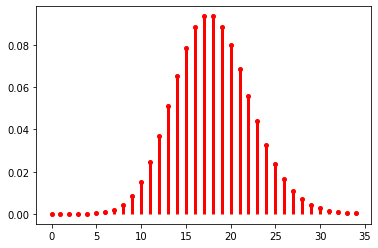

In [3]:
# The number of counts is a discrete random variable.
# Radioactive decays are randomly distributed in time, hence
# the probability distribution for the number of counts is a Poisson with mean 18.0
counts = stats.poisson(xbar)

# plot the pmf
x = np.arange(35)
plt.plot(x,counts.pmf(x), 'ro', ms=4)
plt.vlines(x, 0, counts.pmf(x), colors='r', lw=3)


(b) What is the probability of observing fewer than 10 counts within a ten-minute interval?

In [4]:
# The probability of observing 9 or fewer counts is given by the CDF:
counts.cdf(9)

0.015381097260589295

---

The G-M tube has a circular window with diameter 5cm.

The tube is positioned 10cm from the centre of the charcoal sample.

The tube’s detection efficiency for the low-energy beta particles emitted by C-14 is 2%.

---

### Question 3 

Calculate a 90% confidence interval for the mean number of beta decays occurring in the sample per second.

In [5]:
# area of the window:
a = np.pi * (0.025)**2
print('window area: ', a)

# surface area of a 10cm sphere around the sample:
A = 4 * np.pi * (0.1)**2
print('sphere surface area: ', A)

# efficiency of the detector:
eff = 0.02

# fraction of decays that are actually detected:
f = (a/A) * eff
print('fraction of decays detected: ', f)

# converting the mean and standard error to total decays per second:
mean_decays = xbar / ( 10 * 60 * f )
print('mean decays/s:', mean_decays)

stderr_decays = stderr / ( 10 * 60 * f )
print('stderr decays/s:', stderr_decays)


window area:  0.001963495408493621
sphere surface area:  0.12566370614359174
fraction of decays detected:  0.0003125
mean decays/s: 96.0
stderr decays/s: 11.845924443703241


In [8]:
# Because n<30, we need to use Student's t-distribution to find the confidence interval.
T = stats.t(df=n-1)
t90 = T.interval(0.9)[1]

ci = np.array([mean_decays - t90 * stderr_decays , mean_decays + t90 * stderr_decays])
print('90% CI for decays per second:',ci)

90% CI for decays per second: [ 72.13 119.87]


---

The charcoal is estimated to be 80% carbon by weight.

A carbon atom has a mass of $2 \times 10^{-26}$ kg.

Approximately 1 in every $10^{12}$ carbon atoms in the atmosphere is C-14.

The [half-life](https://en.wikipedia.org/wiki/Half-life) of a radioisotope is the period of time after which its probability of having decayed is 0.5.

The half-life, $t_{1/2}$, is given by the formula
$$ t_{1/2} = \tau\ln (2), $$
where $\tau$ is the *mean lifetime* of the radioisotope.

---

### Question 4

Using your answer to Q3, calculate a 90% confidence interval for the half-life of Carbon-14.

In [12]:
# First, we should convert our confidence interval into decays per C-14 atom per second:

carbon_mass = 0.5 * 0.8
n_C = carbon_mass / 2e-26
n_C14 = n_C / 1e12
print('sample contains', np.format_float_scientific(n_C14), 'atoms of C-14')


ci_C14 = ci / n_C14
print('90% CI for decays per C-14 atom per second:',ci_C14)


sample contains 2.e+13 atoms of C-14
90% CI for decays per C-14 atom per second: [3.61e-12 5.99e-12]


In [13]:
# Now we can use the formula given to calculate the CI for half life.

# The mean lifetime is the inverse of the decay constant (expected decays per second, aka lambda).
# We can plug in the confidence interval that we just calculated.
# The numpy flip() function reverses the order of the CI array.
tau = np.flip(1 / ci_C14)
print('90% CI for mean lifetime (in seconds):', tau)

t_half_ci = tau * np.log(2)
print('90% CI for C-14 half-life (in seconds):', t_half_ci )

90% CI for mean lifetime (in seconds): [1.67e+11 2.77e+11]
90% CI for C-14 half-life (in seconds): [1.16e+11 1.92e+11]


In [14]:
# or in years:
print('90% CI for C-14 half-life (in years):', t_half_ci/(60*60*24*365.25) )

90% CI for C-14 half-life (in years): [3664.72 6090.27]


---

The sample is replaced by a new charcoal sample, of the same mass but unknown origin. 

The G-M counter reads the following counts over six consecutive ten-minute periods: 8, 16, 10, 20, 17, 14.

---

### Question 5

Is this sample older than the first one? Carry out a hypothesis test.

In [15]:
data2 = np.array([8, 16, 10, 20, 17, 14])

# If the second sample is substantially older, it will have lower radioactivity as some of its C-14 will
# have already decayed.

# We can use an independent 2-sample t-test to investigate the difference in the mean number of counts,
# d = mu_sample1 - mu_sample2
# H0 : d = 0
# H1 : d > 1

# Let's choose a significance level alpha = 0.05

# The difference in means is
d = data.mean() - data2.mean()
print('Difference in mean counts:',d)

# In the course notebook, we did the t-test the long-winded way.
#
# Actually, scipy has a convenient t-test function, but we need to remember that it returns a 
# TWO-TAILED p-value. Always check the documentation!
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

# We feed in the two data samples and collect the two-tailed p-value:
p_2tailed = stats.ttest_ind(data,data2).pvalue

# then halve the result to give the one-tailed p-value:
p = p_2tailed / 2
print('p-value:',p)

Difference in mean counts: 3.833333333333334
p-value: 0.10636637637680363


In [ ]:
# So there is no significant difference in the sample means, at the 5% significance level.
# Hence we cannot reject H0. There is no evidence that the second sample is older than the first.

---